In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

##### To-Do List
- Join the table on table_id in order to calculate BB/hour

## Load and Clean Data

In [2]:
# load data
df_poker_data = pd.read_csv('./poker_data_12Mar2024.csv')
df_poker_data.head()

,Unnamed: 0,transaction_id,player_id,table_id,buy_in,cash_out,drink_money,tip,time_in,time_out,bonus
0,0,0,13,0,60,149,0,0.0,2022-10-29 17:00:00,2022-10-29 19:00:00,NaN
1,1,1,92,0,200,692,15,5.0,2022-10-29 17:00:00,2022-10-29 19:00:00,NaN
2,2,2,13,1,100,0,0,0.0,2022-11-27 11:15:00,2022-11-27 11:30:00,NaN
3,3,3,92,1,100,282,0,12.0,2022-11-27 11:15:00,2022-11-27 13:15:00,NaN
4,4,4,13,1,100,101,0,0.0,2022-11-27 11:30:00,2022-11-27 13:15:00,NaN


In [3]:
# Convert datetime columns to correct format
df_poker_data['time_in'] = pd.to_datetime(df_poker_data['time_in'])
df_poker_data['time_out'] = pd.to_datetime(df_poker_data['time_out'])  
# Create profit column
df_poker_data['profit'] = df_poker_data['cash_out'] - df_poker_data['buy_in']
# Create time length column
df_poker_data['duration_hours'] = (df_poker_data['time_out'] - df_poker_data['time_in']).dt.total_seconds() / 3600
# Rename the players
df_poker_data['player_id'] = df_poker_data['player_id'].replace({13:'Amanda', 92:'Nate'})
df_poker_data.head()

,Unnamed: 0,transaction_id,player_id,table_id,buy_in,cash_out,drink_money,tip,time_in,time_out,bonus,profit,duration_hours
0,0,0,Amanda,0,60,149,0,0.0,2022-10-29 17:00:00,2022-10-29 19:00:00,NaN,89,2.00
1,1,1,Nate,0,200,692,15,5.0,2022-10-29 17:00:00,2022-10-29 19:00:00,NaN,492,2.00
2,2,2,Amanda,1,100,0,0,0.0,2022-11-27 11:15:00,2022-11-27 11:30:00,NaN,-100,0.25
3,3,3,Nate,1,100,282,0,12.0,2022-11-27 11:15:00,2022-11-27 13:15:00,NaN,182,2.00
4,4,4,Amanda,1,100,101,0,0.0,2022-11-27 11:30:00,2022-11-27 13:15:00,NaN,1,1.75


In [4]:
# Create a new dataframe for ease of data manipulation
df_sum = df_poker_data[['player_id', 'profit', 'time_in', 'duration_hours']].rename(columns={
    'player_id': 'Player', 'profit': 'Profit', 'time_in': 'Start Time', 
    'duration_hours': 'Duration_hours'})
df_sum.head()

,Player,Profit,Start Time,Duration_hours
0,Amanda,89,2022-10-29 17:00:00,2.00
1,Nate,492,2022-10-29 17:00:00,2.00
2,Amanda,-100,2022-11-27 11:15:00,0.25
3,Nate,182,2022-11-27 11:15:00,2.00
4,Amanda,1,2022-11-27 11:30:00,1.75


## Data Visualizations

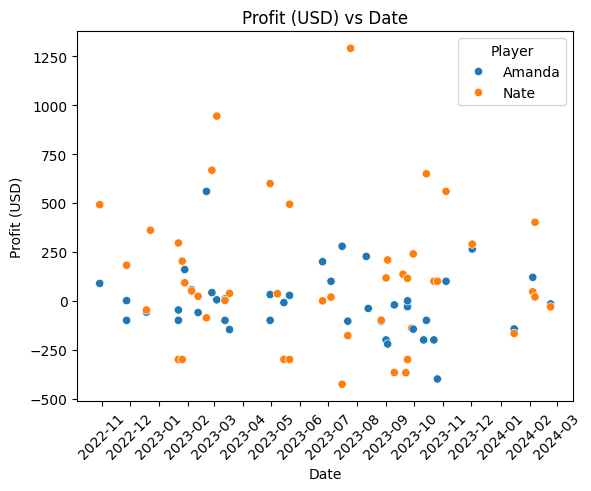

In [5]:
# Graph scatterplot of profit vs date
sns.scatterplot(data=df_sum, x='Start Time', y='Profit', hue='Player')

# Format title and axes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45);
plt.xlabel('Date')
plt.ylabel('Profit (USD)')
plt.title('Profit (USD) vs Date');

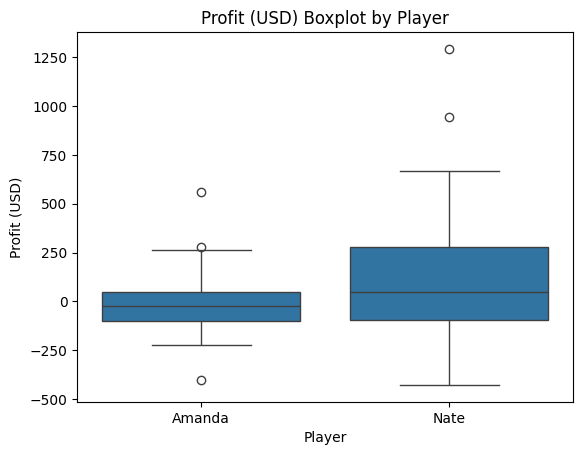

In [6]:
sns.boxplot(data=df_sum, x='Player', y='Profit')
plt.ylabel('Profit (USD)');
plt.title('Profit (USD) Boxplot by Player');

## Summary Statistics

In [7]:
df_totals = df_sum.groupby('Player')[['Profit','Duration_hours']].sum().reset_index()
df_totals['Rate'] = df_totals['Profit'] / df_totals['Duration_hours']

df_totals.head()

,Player,Profit,Duration_hours,Rate
0,Amanda,-433,94.583333,-4.577974
1,Nate,5367,107.166667,50.080871
